<a href="https://colab.research.google.com/github/ali-rabiee/Decoding-Grasping-Movements-Analysis-and-Comparison-of-EEG-and-tEEG/blob/main/EEG_tEEG_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import scipy.io.wavfile
import scipy.signal
import scipy.stats as stats
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.utils import shuffle
from scipy.signal import butter, filtfilt
import zipfile
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connecting to Google drive for accesing the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# MNE

In [ ]:
!pip install mne

In [ ]:
# Connecting to Google drive for accesing the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from preprocessing import *
# path = "/content/drive/Shareddrives/TNLabAnalysis_VisionBasedGrasping/Tripolar_ 4_channel/subject4/task_3"
# df = read_data_and_preprocessing(path, events=[0, 1, 2], denoise=5)

# List of subjects
subjects = ['subject1']

# Base path
base_path = "/content/drive/Shareddrives/TNLabAnalysis_VisionBasedGrasping/Tripolar_ 4_channel/"

# Initialize an empty DataFrame to store the concatenated data
df = pd.DataFrame()

# Loop over each subject
for subject in subjects:
    # Construct the full path for the current subject
    path = os.path.join(base_path, subject, 'task_3')

    # Read and preprocess the data for the current subject
    df_sub = read_data_and_preprocessing(path, events=[0, 1, 2], denoise=20)

    # Append the current subject's data to the all_data DataFrame
    df = df.append(df_sub, ignore_index=True)

# Now, all_data contains the concatenated data for all subjects



In [ ]:
# Create an events array with composite event IDs
trial_duration = 1501
movement_onset_time = 751
n_trials = len(df) // trial_duration

# Adding the movement onset events to the data mannually (buzzer)
df['movement_onset'] = 0

for i in range(n_trials):
    onset_index = i * trial_duration + movement_onset_time
    df.loc[onset_index, 'movement_onset'] = 1

df["composite_events"] =  df["events"] * 10 + df["movement_onset"]

df_eeg = df[['P3_e', 'C3_e', 'C4_e', 'F5_e', 'composite_events']]
df_tripolar = df[['P3_t', 'C3_t', 'C4_t', 'F5_t', 'composite_events']]

In [ ]:
import mne
import numpy as np

# Create info objects for your EEG and tripolar data
sfreq = 250  # Set the correct sampling frequency for your data

ch_names_eeg = ['P3_e', 'C3_e', 'C4_e', 'F5_e']
ch_names_tripolar = ['P3_t', 'C3_t', 'C4_t', 'F5_t']

info_eeg = mne.create_info(ch_names=ch_names_eeg, sfreq=sfreq, ch_types='eeg')
info_tripolar = mne.create_info(ch_names=ch_names_tripolar, sfreq=sfreq, ch_types='eeg')

# Create raw objects using the data from your dataframes
data_eeg = df_eeg[ch_names_eeg].T.to_numpy()
data_tripolar = df_tripolar[ch_names_tripolar].T.to_numpy()

raw_eeg = mne.io.RawArray(data_eeg, info_eeg)
raw_tripolar = mne.io.RawArray(data_tripolar, info_tripolar)

# Define the standard 10-20 names for your channels
standard_ch_names_eeg = ['P3', 'C3', 'C4', 'F5']
standard_ch_names_tripolar = ['P3', 'C3', 'C4', 'F5']

# Rename the channels in the Raw objects
raw_eeg.rename_channels({old: new for old, new in zip(ch_names_eeg, standard_ch_names_eeg)})
raw_tripolar.rename_channels({old: new for old, new in zip(ch_names_tripolar, standard_ch_names_tripolar)})

# Set the montage
montage = mne.channels.make_standard_montage('standard_1020')
raw_eeg.set_montage(montage)
raw_tripolar.set_montage(montage)

sampling_interval = 1
# Create events array from the 'composite_events' column
events_eeg = np.c_[
    np.arange(0, len(df_eeg), sampling_interval),
    np.zeros((len(df_eeg)//sampling_interval, 1), dtype=int),
    df_eeg['composite_events'].values[:, np.newaxis]
].astype(int)

events_tripolar = np.c_[
    np.arange(0, len(df_tripolar), sampling_interval),
    np.zeros((len(df_tripolar)//sampling_interval, 1), dtype=int),
    df_tripolar['composite_events'].values[:, np.newaxis]
].astype(int)

Creating RawArray with float64 data, n_channels=4, n_times=112575
    Range : 0 ... 112574 =      0.000 ...   450.296 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=112575
    Range : 0 ... 112574 =      0.000 ...   450.296 secs
Ready.


## Topomaps & ERP analysis

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 826 original time points ...
1 bad epochs dropped
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 826 original time points ...
1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legac

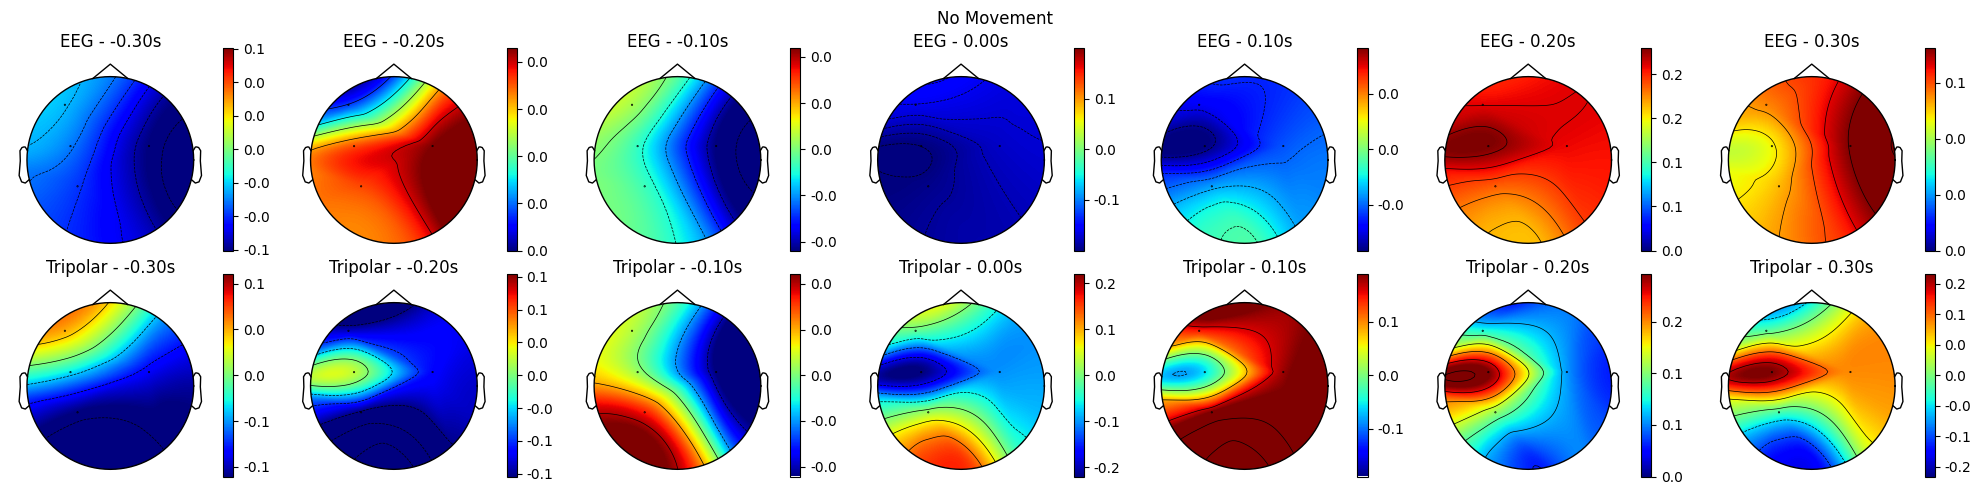

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 826 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 826 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legac

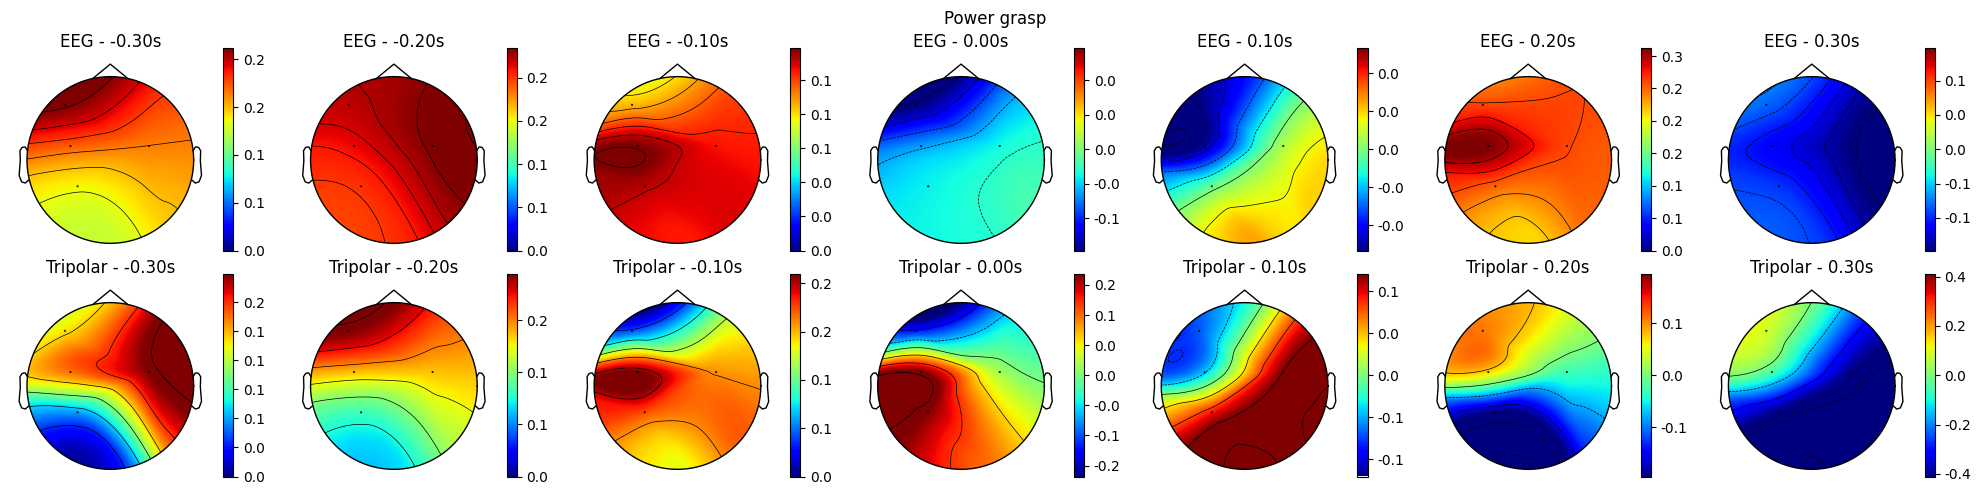

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 826 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 826 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legac

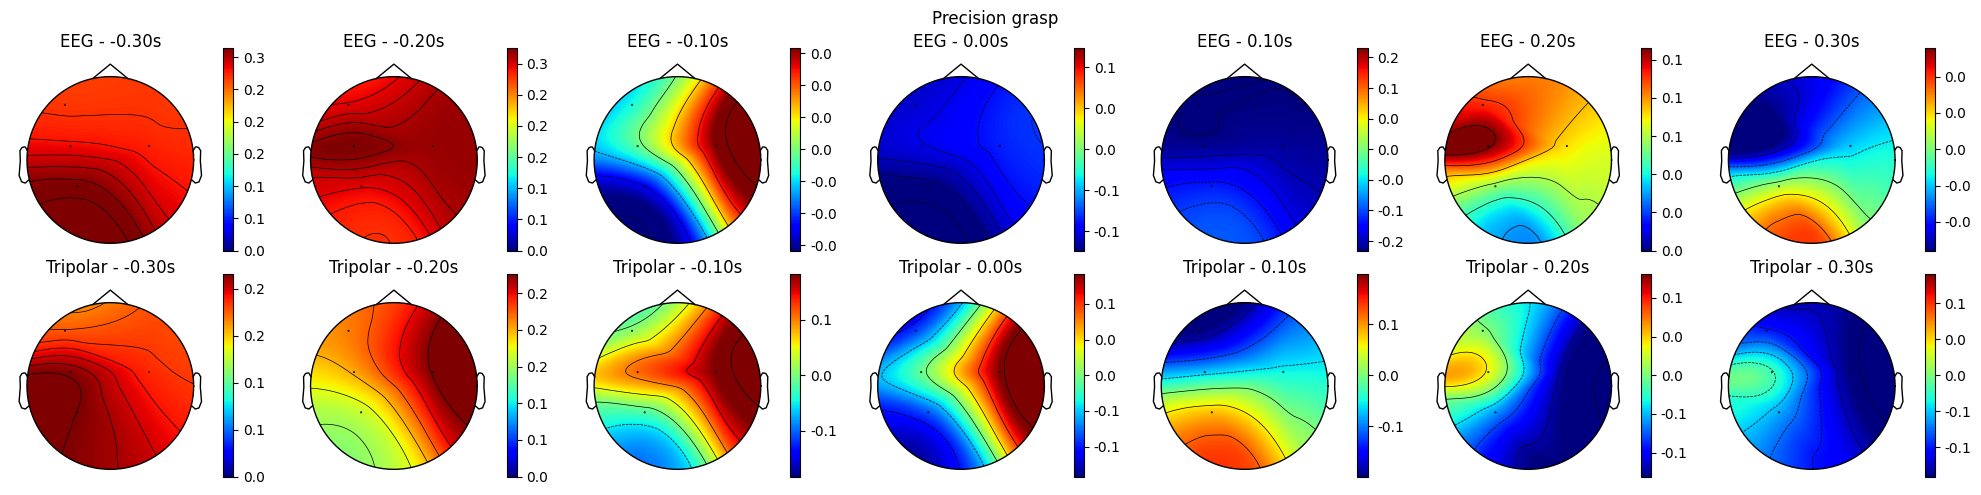

In [ ]:
import matplotlib.pyplot as plt

# Define your event_id dictionary
event_id_dict = {'No Movement': 1, 'Power grasp': 11, 'Precision grasp': 21}

# Define your times for plotting
times = np.arange(-0.3, 0.31, 0.1)
window_length = 0.02 # 20 ms

# Loop through each event ID to create epochs and plot topomaps
for event_name, event_id in event_id_dict.items():

    fig, axs = plt.subplots(2, len(times), figsize=(20, 5))
    fig.suptitle(event_name)

    # Create epochs centered around the movement onset (0 ms) for each event ID
    epochs_eeg = mne.Epochs(raw_eeg, events=events_eeg, event_id={event_name: event_id}, tmin=-0.3, tmax=3, baseline=None, detrend=1, preload=True)
    epochs_tripolar = mne.Epochs(raw_tripolar, events=events_tripolar, event_id={event_name: event_id}, tmin=-0.3, tmax=3, baseline=None, detrend=1, preload=True)

    # Iterate through each time point
    for idx, t in enumerate(times):
        # Get average around time point for EEG
        avg_data_eeg = epochs_eeg.copy().crop(tmin=t - window_length / 2, tmax=t + window_length / 2).average().data
        avg_data_eeg = np.mean(avg_data_eeg, axis=-1, keepdims=True)

        # Get average around time point for Tripolar
        avg_data_tripolar = epochs_tripolar.copy().crop(tmin=t - window_length / 2, tmax=t + window_length / 2).average().data
        avg_data_tripolar = np.mean(avg_data_tripolar, axis=-1, keepdims=True)

        # Plot the averaged topomaps for EEG
        im, _ = mne.viz.plot_topomap(avg_data_eeg[:, 0], epochs_eeg.info,axes=axs[0, idx], show=False, extrapolate='head', ch_type='eeg', cmap="jet", contours=6, sensors=True)
        # Adjust the color limits to reflect the global max and min
        # im.set_clim(-0.5, 0.3)
        fig.colorbar(im, ax=axs[0, idx], format='%3.1f', orientation='vertical')
        axs[0, idx].set_title(f"EEG - {t:.2f}s")

        # Plot the averaged topomaps for EEG
        im, _ = mne.viz.plot_topomap(avg_data_tripolar[:, 0], epochs_tripolar.info, axes=axs[1, idx], show=False, extrapolate='head', ch_type='eeg', cmap="jet", contours=6, sensors=True)
        # Adjust the color limits to reflect the global max and min
        # im.set_clim(-0.5, 0.3)
        fig.colorbar(im, ax=axs[1, idx], format='%3.1f', orientation='vertical')
        axs[1, idx].set_title(f"Tripolar - {t:.2f}s")

    plt.tight_layout()
    plt.show()


In [ ]:
# Create epochs from the annotations
# Define your event_id dictionary
event_id_dict = {'No Movement': 1, 'Power grasp': 11, 'Precision grasp': 21}

epochs_eeg = mne.Epochs(raw_eeg, events=events_eeg, event_id={event_name: event_id}, tmin=-0.3, tmax=3, baseline=None, detrend=1, preload=True)
epochs_tripolar = mne.Epochs(raw_tripolar, events=events_tripolar, event_id={event_name: event_id}, tmin=-0.3, tmax=3, baseline=None, detrend=1, preload=True)

# Compute the ERP and get the average over all trials
erps = epochs.average()

# Get the data and times arrays
data = erps.data
times = erps.times

# Find the indices of the times array corresponding to the 100ms and 800ms
start_idx = np.searchsorted(times, 0.1)
end_idx = np.searchsorted(times, 0.8)

# Find the time point of the peak activity within the specified window for each electrode
peak_times_idx = np.argmax(data[:, start_idx:end_idx], axis=1) + start_idx
peak_times_ms = times[peak_times_idx] * 1000  # Convert to milliseconds

# Plot topomap of peak times
fig, ax = plt.subplots()
# mne.viz.plot_topomap(peak_times_ms, erps.info, axes=ax, show=False)
im, cm = mne.viz.plot_topomap(peak_times_ms, erps.info, axes=ax, show=False, extrapolate='head', ch_type='eeg', cmap="jet", contours=10, sensors=True)
ax.set_title('Topomap of peak times (ms)')
# Create a custom colorbar norm
# norm = mcolors.Normalize(vmin=-400, vmax=400)
clb = fig.colorbar(im, cmap='jet')
# Display the plot
plt.show()

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 751 original time points ...
0 bad epochs dropped
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 751 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 751 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 751 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is

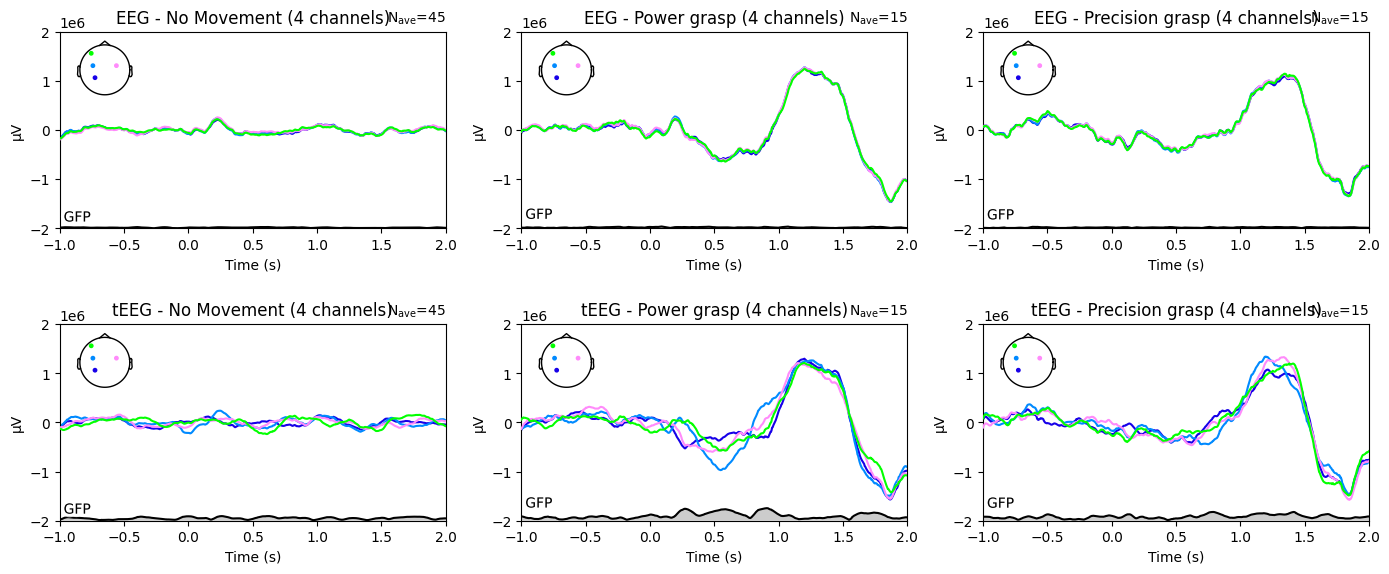

In [ ]:
import matplotlib.pyplot as plt

# Define event_id dictionary
event_id_dict = {'No Movement': 1, 'Power grasp': 11, 'Precision grasp': 21}

fig, axs = plt.subplots(2, 3, figsize=(14, 6))  # 2 rows (EEG & Tripolar), 3 columns for each event ID

for idx, (event_name, event_id) in enumerate(event_id_dict.items()):
    # Create epochs from the annotations or events array
    epochs_eeg = mne.Epochs(raw_eeg, events=events_eeg, event_id={event_name: event_id}, tmin=-1, tmax=2, baseline=None, preload=True)
    epochs_tripolar = mne.Epochs(raw_tripolar, events=events_tripolar, event_id={event_name: event_id}, tmin=-1, tmax=2, baseline=None, preload=True)

    # Compute the ERPs by averaging the epochs
    erp_eeg = epochs_eeg.average()
    erp_tripolar = epochs_tripolar.average()

    # Plot the ERPs
    erp_eeg.plot(axes=axs[0, idx], titles=f'EEG - {event_name}', show=False, spatial_colors=True, ylim=dict(eeg=[-2e6, 2e6]), gfp=True)
    erp_tripolar.plot(axes=axs[1, idx], titles=f'tEEG - {event_name}', show=False, spatial_colors=True, ylim=dict(eeg=[-2e6, 2e6]), gfp=True)

    # Adjust the line width for EEG and Tripolar plots
    for ax in [axs[0, idx], axs[1, idx]]:
        for line in ax.lines:
            line.set_linewidth(1.5)

# Display the complete figure
plt.tight_layout()
plt.show()


## PSD

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 1501 original time points ...
1 bad epochs dropped
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 1501 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 1501 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 1501 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windo

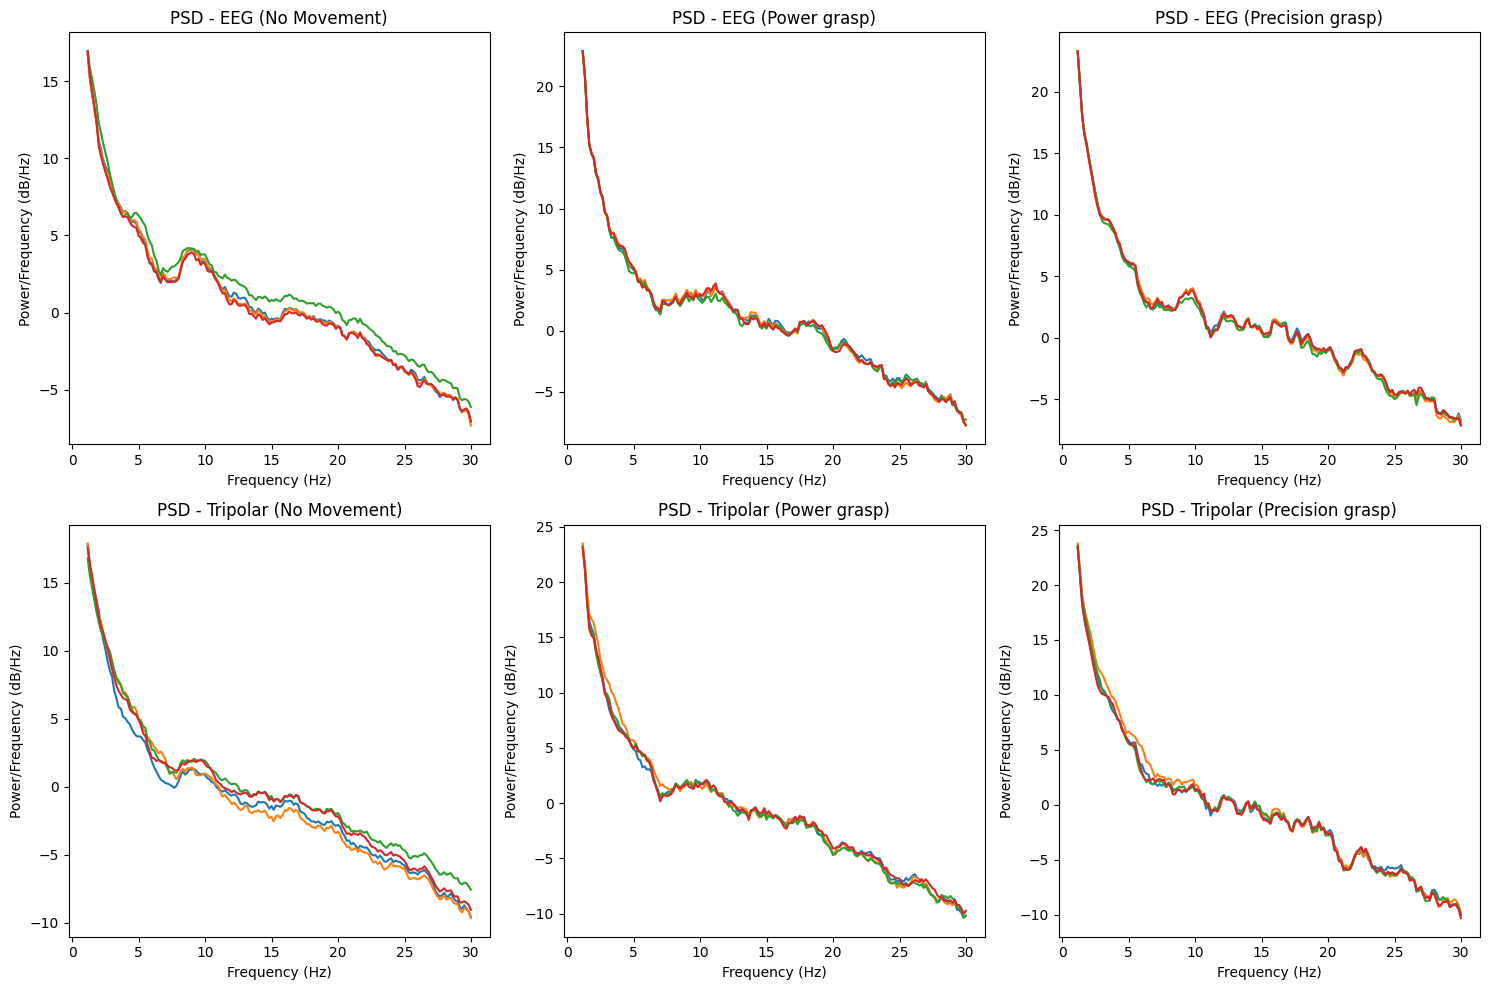

In [ ]:
import matplotlib.pyplot as plt
import mne

# Define event_id dictionary
event_id_dict = {'No Movement': 1, 'Power grasp': 11, 'Precision grasp': 21}

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows (EEG & Tripolar), 3 columns for each event ID

for idx, (event_name, event_id) in enumerate(event_id_dict.items()):
    # Create epochs from the annotations or events array
    epochs_eeg = mne.Epochs(raw_eeg, events=events_eeg, event_id={event_name: event_id}, tmin=-3, tmax=3, baseline=None, preload=True)
    epochs_tripolar = mne.Epochs(raw_tripolar, events=events_tripolar, event_id={event_name: event_id}, tmin=-3, tmax=3, baseline=None, preload=True)

    # Compute and plot the Power Spectral Density (PSD) for EEG
    epo_spectrum_eeg = epochs_eeg.compute_psd(method="multitaper", fmin=1, fmax=30)
    psd_eeg, freqs_eeg = epo_spectrum_eeg.get_data(return_freqs=True)
    for ch_idx in range(psd_eeg.shape[1]):
        axs[0, idx].plot(freqs_eeg, 10 * np.log10(psd_eeg[:, ch_idx].mean(axis=0)), linewidth=1.5)
    axs[0, idx].set_title(f'PSD - EEG ({event_name})')
    axs[0, idx].set_xlabel('Frequency (Hz)')
    axs[0, idx].set_ylabel('Power/Frequency (dB/Hz)')

    # Compute and plot the Power Spectral Density (PSD) for Tripolar
    epo_spectrum_tripolar = epochs_tripolar.compute_psd(method="multitaper", fmin=1, fmax=30)
    psd_tripolar, freqs_tripolar = epo_spectrum_tripolar.get_data(return_freqs=True)
    for ch_idx in range(psd_tripolar.shape[1]):
        axs[1, idx].plot(freqs_tripolar, 10 * np.log10(psd_tripolar[:, ch_idx].mean(axis=0)), linewidth=1.5)
    axs[1, idx].set_title(f'PSD - Tripolar ({event_name})')
    axs[1, idx].set_xlabel('Frequency (Hz)')
    axs[1, idx].set_ylabel('Power/Frequency (dB/Hz)')

# Adjust layout for better readability and display the complete figure
plt.tight_layout()
plt.show()


Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 251 original time points ...
0 bad epochs dropped
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 251 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 251 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 251 original time points ...
0 bad epochs dropped
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 251 original time points ...
0

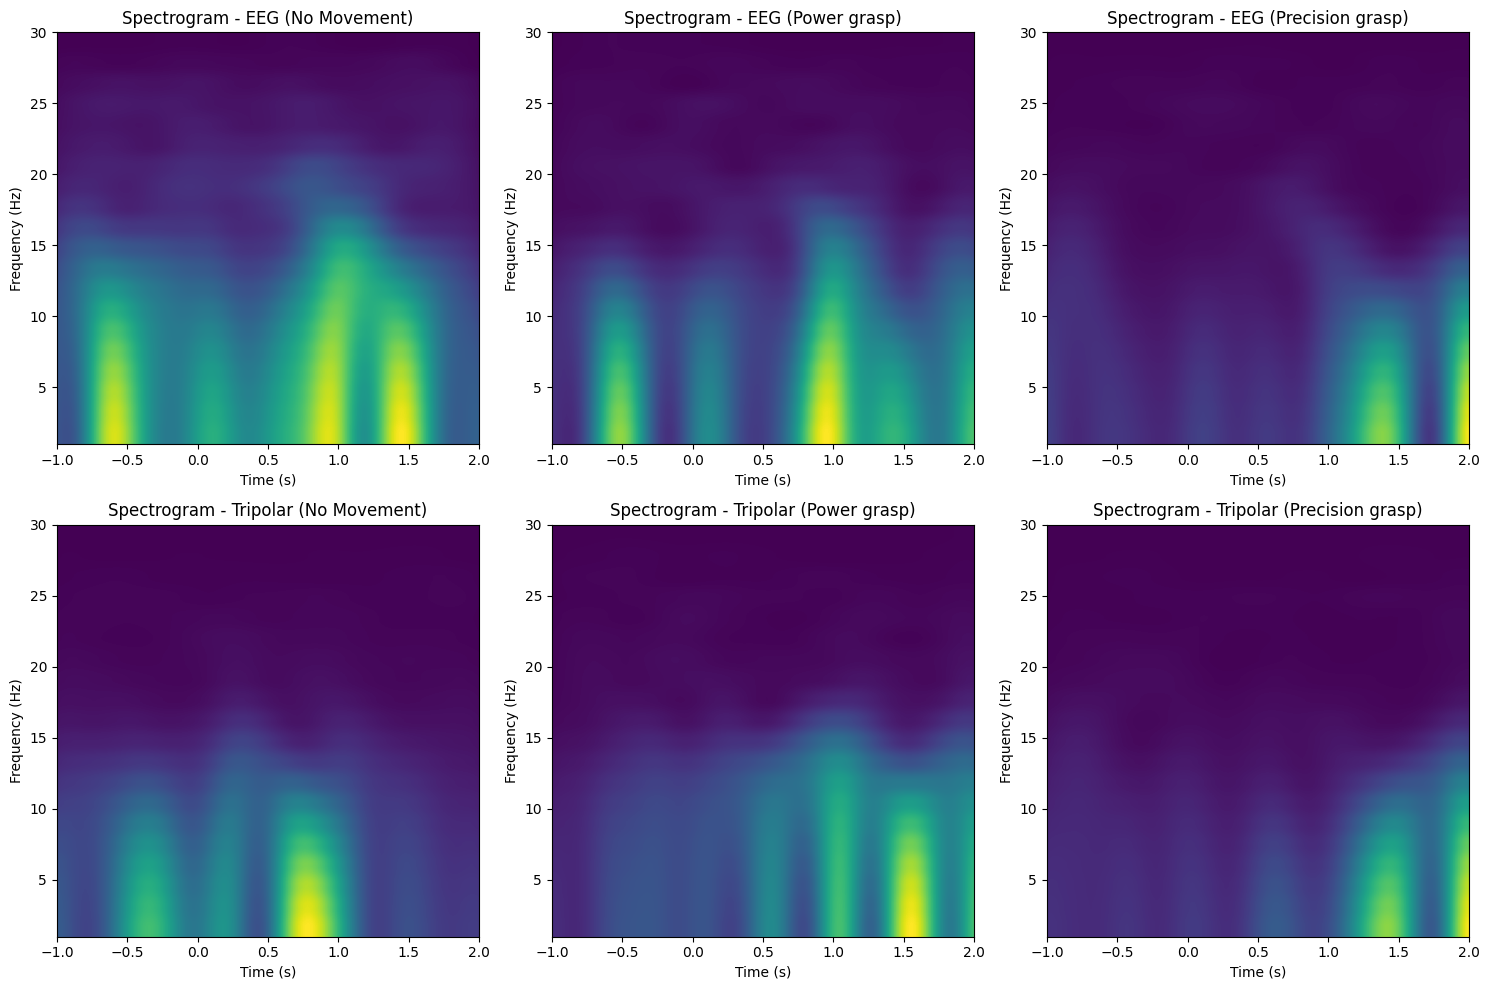

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Define event_id dictionary
event_id_dict = {'No Movement': 1, 'Power grasp': 11, 'Precision grasp': 21}

# Define frequencies of interest
frequencies = np.logspace(*np.log10([1, 30]), num=20)
n_cycles = frequencies / 2.  # different number of cycle per frequency

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows (EEG & Tripolar), 3 columns for each event ID

for idx, (event_name, event_id) in enumerate(event_id_dict.items()):
    # Create epochs from the annotations or events array
    epochs_eeg = mne.Epochs(raw_eeg, events=events_eeg, event_id={event_name: event_id}, tmin=-0.5, tmax=0.5, baseline=None, preload=True)
    epochs_tripolar = mne.Epochs(raw_tripolar, events=events_tripolar, event_id={event_name: event_id}, tmin=-0.5, tmax=0.5, baseline=None, preload=True)

    # Compute the TFR for EEG
    tfr_eeg = mne.time_frequency.tfr_morlet(epochs_eeg, freqs=frequencies, n_cycles=n_cycles, return_itc=False, picks=['C3'])

    # Plot the spectrogram for EEG
    axs[0, idx].imshow(tfr_eeg.data.mean(0), aspect='auto', origin='lower', extent=[-1, 2, 1, 30])
    axs[0, idx].set_title(f'Spectrogram - EEG ({event_name})')
    axs[0, idx].set_xlabel('Time (s)')
    axs[0, idx].set_ylabel('Frequency (Hz)')

    # Compute the TFR for Tripolar
    tfr_tripolar = mne.time_frequency.tfr_morlet(epochs_tripolar, freqs=frequencies, n_cycles=n_cycles, return_itc=False, picks=['C3'])

    # Plot the spectrogram for Tripolar
    axs[1, idx].imshow(tfr_tripolar.data.mean(0), aspect='auto', origin='lower', extent=[-1, 2, 1, 30])
    axs[1, idx].set_title(f'Spectrogram - Tripolar ({event_name})')
    axs[1, idx].set_xlabel('Time (s)')
    axs[1, idx].set_ylabel('Frequency (Hz)')

# Adjust layout for better readability and display the complete figure
plt.tight_layout()
plt.show()


# SNR Comparison

In [ ]:
path = "/content/drive/Shareddrives/TNLabAnalysis_VisionBasedGrasping/Tripolar_ 4_channel/subject1/task_3"
df = read_data_and_preprocessing(path, events=[0, 1, 2], denoise=0)
df_eeg = df[['P3_e', 'C3_e', 'C4_e', 'F5_e', 'events']]
df_tripolar = df[['P3_t', 'C3_t', 'C4_t', 'F5_t', 'events']]

# df_eeg.rename(
#     columns={"P3_e": "P3", "C3_e": "C3", "C4_e": "C4", "F5_e": "F5"},
#     inplace=True,
# )

# df_tripolar.rename(
#     columns={"P3_t": "P3", "C3_t": "C3", "C4_t": "C4", "F5_t": "F5"},
#     inplace=True,
# )

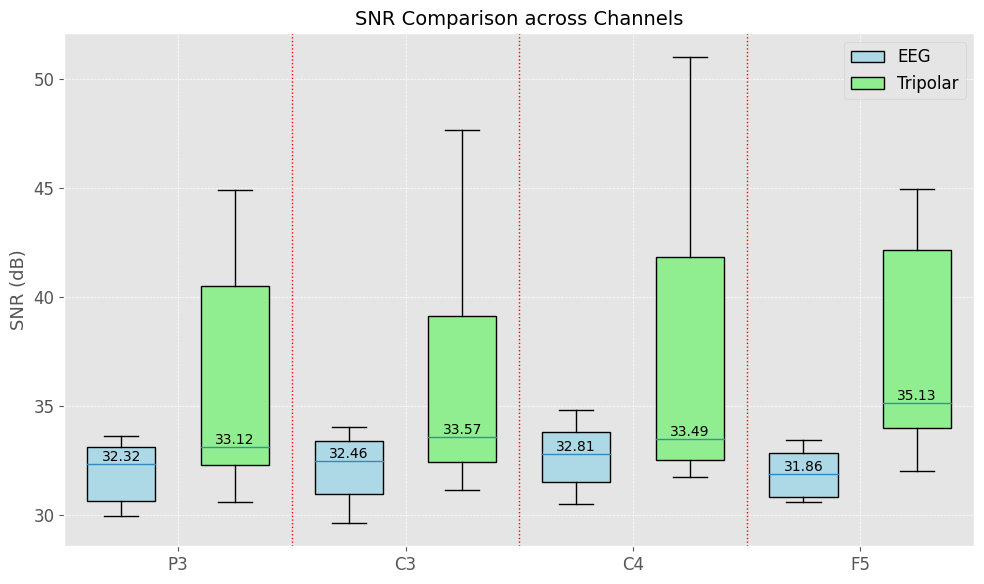

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Wavelet Denoising
def wavelet_denoise(signal, wavelet='db8', threshold_method='hard'):
    # Set the decomposition level
    level = pywt.dwt_max_level(data_len=len(signal), filter_len=pywt.Wavelet(wavelet).dec_len)

    # Decompose signal
    coeffs = pywt.wavedec(signal, wavelet, mode='per', level=level)

    # Universal threshold value
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(signal)))

    # Apply thresholding
    coeffs_thresholded = [pywt.threshold(c, threshold, mode=threshold_method) for c in coeffs]

    # Reconstruct signal
    reconstructed = pywt.waverec(coeffs_thresholded, wavelet, mode='per')

    # Match lengths
    if len(reconstructed) > len(signal):
        reconstructed = reconstructed[:len(signal)]
    elif len(reconstructed) < len(signal):
        pad_len = len(signal) - len(reconstructed)
        reconstructed = np.pad(reconstructed, (0, pad_len), 'constant')

    return reconstructed

def calculate_snr(signal_data, noise_data):
    rms_signal = np.sqrt(np.mean(signal_data**2))
    rms_noise = np.sqrt(np.mean(noise_data**2))
    if rms_noise == 0:
        return np.inf
    return 20 * np.log10(rms_signal / rms_noise)

channels = ['P3', 'C3', 'C4', 'F5']
channels_eeg = ['P3_e', 'C3_e', 'C4_e', 'F5_e']
channels_tripolar = ['P3_t', 'C3_t', 'C4_t', 'F5_t']
samples_per_trial = 1501

# Compute SNR for EEG
data_eeg = []
for channel in channels_eeg:
    snr_values = []
    for i in range(0, len(df_eeg), samples_per_trial):
        original_signal = df_eeg[channel].iloc[i:i+samples_per_trial].values
        denoised_signal = wavelet_denoise(original_signal)
        noise_data = original_signal - denoised_signal
        snr_values.append(calculate_snr(denoised_signal, noise_data))
    data_eeg.append(snr_values)

# Compute SNR for tripolar
data_tripolar = []
for channel in channels_tripolar:
    snr_values = []
    for i in range(0, len(df_tripolar), samples_per_trial):
        original_signal = df_tripolar[channel].iloc[i:i+samples_per_trial].values
        denoised_signal = wavelet_denoise(original_signal)
        noise_data = original_signal - denoised_signal
        snr_values.append(calculate_snr(denoised_signal, noise_data))
    data_tripolar.append(snr_values)

# Settings for visual appeal
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(10, 6))

# Interleave EEG and Tripolar data for plotting
data_combined = []
for i in range(len(channels)):
    data_combined.append(data_eeg[i])
    data_combined.append(data_tripolar[i])

# Boxplot positions
num_boxes = len(channels) * 2
positions = range(num_boxes)

# Make the boxplots
bp = ax.boxplot(data_combined, vert=True, patch_artist=True, positions=positions,
                showfliers=False, widths=0.6)

# Coloring the boxes
colors = ['lightblue', 'lightgreen'] * len(channels)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Annotate with median values
for idx, (line, color) in enumerate(zip(bp['medians'], colors)):
    x, y = line.get_data()
    ax.text(x[0]+0.3, y[0], f'{y[0]:.2f}', horizontalalignment='center',
            verticalalignment='bottom', color='black', fontsize=10)

tick_positions = [(i*2) + 0.5 for i in range(len(channels))]
for pos in tick_positions[:-1]:  # No line needed after the last channel
    ax.axvline(pos+1, color='red', linestyle=':', linewidth=1)

# Set labels
ax.set_title(f"SNR Comparison across Channels", fontsize=14)
ax.set_ylabel("SNR (dB)", fontsize=13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(channels, fontsize=12)
ax.legend([bp["boxes"][0], bp["boxes"][1]], ['EEG', 'Tripolar'], loc='upper right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Object `wavelist` not found.


# Functional Connectivity

In [ ]:
# Connecting to Google drive for accesing the dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from preprocessing import *

# Read and Prepare Data
path = "/content/drive/Shareddrives/TNLabAnalysis_VisionBasedGrasping/Tripolar_ 4_channel/subject4/task_3"
df = read_data_and_preprocessing(path, events=[0, 1, 2], denoise=0)
# Seperate the inputs and labels
labels = df["events"].to_list()
df.drop(['events'], axis=1, inplace=True)
df_eeg = df[['P3_e', 'C3_e', 'C4_e', 'F5_e']]
df_tripolar = df[['P3_t', 'C3_t', 'C4_t', 'F5_t']]

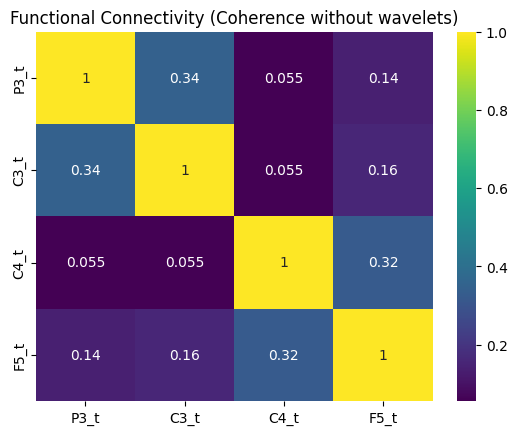

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import coherence as signal_coherence

# Convert the DataFrame to a numpy array and transpose it to have shape (channels x time)
eeg_data = df_tripolar.to_numpy().T

n_channels, n_samples = eeg_data.shape

# Calculate coherence for each pair of channels
coherence_array = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(i, n_channels):
        f, Cxy = signal_coherence(eeg_data[i, :], eeg_data[j, :], fs=250)
        coherence_array[i, j] = np.mean(Cxy)  # take average coherence
        coherence_array[j, i] = coherence_array[i, j]  # the matrix is symmetric

# Plot the functional connectivity as a heatmap
sns.heatmap(coherence_array, cmap='viridis', annot=True, xticklabels=df_tripolar.columns, yticklabels=df_tripolar.columns)
plt.title('Functional Connectivity')
plt.show()


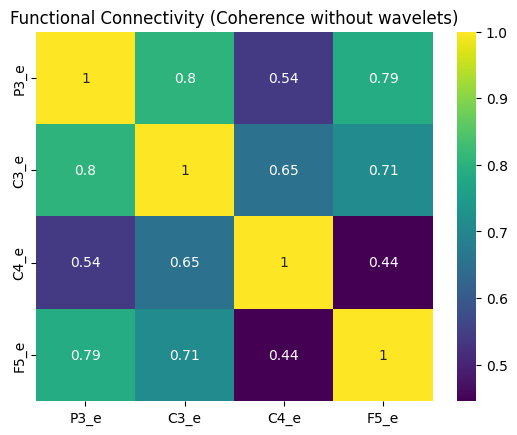

In [ ]:
# Convert the DataFrame to a numpy array and transpose it to have shape (channels x time)
eeg_data = df_eeg.to_numpy().T

n_channels, n_samples = eeg_data.shape

# Calculate coherence for each pair of channels
coherence_array = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(i, n_channels):
        f, Cxy = signal_coherence(eeg_data[i, :], eeg_data[j, :], fs=250)
        coherence_array[i, j] = np.mean(Cxy)  # take average coherence
        coherence_array[j, i] = coherence_array[i, j]  # the matrix is symmetric

# Plot the functional connectivity as a heatmap
sns.heatmap(coherence_array, cmap='viridis', annot=True, xticklabels=df_eeg.columns, yticklabels=df_eeg.columns)
plt.title('Functional Connectivity')
plt.show()

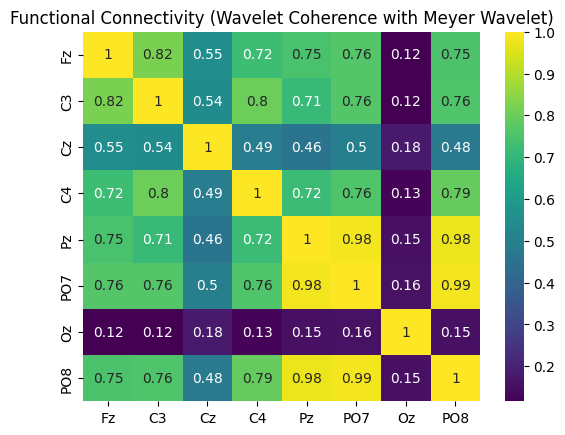

In [ ]:
import pywt

# Convert the DataFrame to a numpy array and transpose it to have shape (channels x time)
eeg_data = df.to_numpy().T

n_channels, n_samples = eeg_data.shape

# Discrete Wavelet Transform
wavelet = pywt.Wavelet('dmey')  # dmey corresponds to the Meyer wavelet in PyWavelets

# Calculate wavelet transform for each channel
cA, cD = pywt.dwt(eeg_data[0, :], wavelet)  # do DWT for one channel to get the transformed data length
transformed_len = len(cA)

dwt_transform = np.empty((n_channels, transformed_len))  # change n_samples to transformed_len
for i in range(n_channels):
    dwt_transform[i, :] = pywt.dwt(eeg_data[i, :], wavelet)[0]

# Calculate correlation for each pair of channels
coherence_array = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(i, n_channels):
        f, Cxy = signal_coherence(dwt_transform[i, :], dwt_transform[j, :])
        coherence_array[i, j] = np.mean(Cxy)  # take average coherence
        coherence_array[j, i] = coherence_array[i, j]  # the matrix is symmetric

channel_names = ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']

# Plot the functional connectivity as a heatmap
sns.heatmap(coherence_array, cmap='viridis', annot=True, xticklabels=channel_names, yticklabels=channel_names)
plt.title('Functional Connectivity (Wavelet Coherence with Meyer Wavelet)')
plt.show()

In [ ]:
import mne
import numpy as np

# Create an Info object with a dummy channel list that includes all standard 10-20 electrodes.
# We will only be using it to set the montage.
dummy_ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
info = mne.create_info(ch_names=dummy_ch_names, sfreq=1000., ch_types='eeg')

# Apply the standard montage
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)

# Define custom colors for the electrodes of interest, set others to black
colors = {ch: 'black' for ch in dummy_ch_names}
colors.update({'C3': 'r', 'C4': 'g', 'F5': 'b', 'P3': 'y'})

# Plot the sensors
mne.viz.plot_sensors(info, ch_type='eeg', show_names=True, title='Custom Sensor Colors', sphere='auto')


# Wavelet analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def average_wavelet_coefficients(X, wavelet='morl', scales=np.arange(1, 128), sr=250):
    coefficients_list = []

    # For each instance in X
    for instance in X:
        instance_coefficients = []

        # For each channel in the instance
        for column in range(instance.shape[1]):
            coefficients, freqs = pywt.cwt(instance[:, column], scales=scales, wavelet=wavelet, sampling_period=1/sr)
            instance_coefficients.append(np.abs(coefficients)**2)

        coefficients_list.append(instance_coefficients)

    # Average across all instances
    avg_coefficients = np.mean(coefficients_list, axis=0)
    return avg_coefficients, freqs

def scale_to_freq(scale, sampling_rate=250.0, cf=0.8491):
    """Converts wavelet scale to frequency."""
    return cf / scale * sampling_rate

def plot_coefficients(eeg_avg_coeffs, teeg_avg_coeffs, frequencies, times=None, levels=None, num_channels=4):
    for ch in range(num_channels):
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))

        m1, m2 = eeg_avg_coeffs[ch].max(), teeg_avg_coeffs[ch].max()

        # Adjust extent for frequencies on the y-axis
        extent=[-1, 1, frequencies[-1], frequencies[0]]

        im1 = axes[0].imshow(eeg_avg_coeffs[ch], aspect='auto', cmap='jet', extent=extent)
        im1.set_clim(0, 50)
        # im1.set_clim(0, int(max(m1, m2)))
        # Add contours
        # axes[0].contourf(times, frequencies, eeg_avg_coeffs[ch], levels=levels, cmap='jet', extent=extent, alpha=0)

        # axes[0].set_ylim([frequencies[-1], frequencies[0]])   # Set y-limits here
        # axes[0].set_yscale('log')
        axes[0].set_ylabel('Frequency (Hz)')
        axes[0].set_xlabel('Time')
        fig.colorbar(im1, ax=axes[0], orientation='vertical')
        axes[0].axvline(0, color='black', linewidth=1)

        im2 = axes[1].imshow(teeg_avg_coeffs[ch], aspect='auto', cmap='jet', extent=extent)
        im2.set_clim(0, 50)
        # im2.set_clim(0, int(max(m1, m2)))
        # Add contours
        # axes[1].contourf(times, frequencies, teeg_avg_coeffs[ch], levels=levels, cmap='jet', extent=extent, alpha=0)

        # axes[1].set_ylim([frequencies[-1], frequencies[0]])    # Set y-limits here
        # axes[1].set_yscale('log')
        axes[1].set_ylabel('Frequency (Hz)')
        axes[1].set_xlabel('Time')
        fig.colorbar(im2, ax=axes[1], orientation='vertical')
        axes[1].axvline(0, color='black', linewidth=1)

# This function prepare the X_train, X_test, y_train, y_test
def prepare_data(df, labels, win_size=1501, time_win=(0, None), balance=False):

    X = []
    y = []

    start, end = time_win
    for i in range(0, len(df), win_size):
        x = df[i:i+win_size].values

        # Applying the time window to select a specific range of rows
        x = x[start:end]
        X.append(x)
        y.append(labels[i])

    X, y = np.array(X), np.array(y)

    # Shuffle data
    # X, y = shuffle(X, y)
    if balance:
    # Balance the dataset
        oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = oversampler.fit_resample(X.reshape(-1, X.shape[1]*X.shape[2]), y)
        X_resampled = X_resampled.reshape(-1, X.shape[1], X.shape[2])
        return X_resampled, y_resampled
    else:
        return X, y

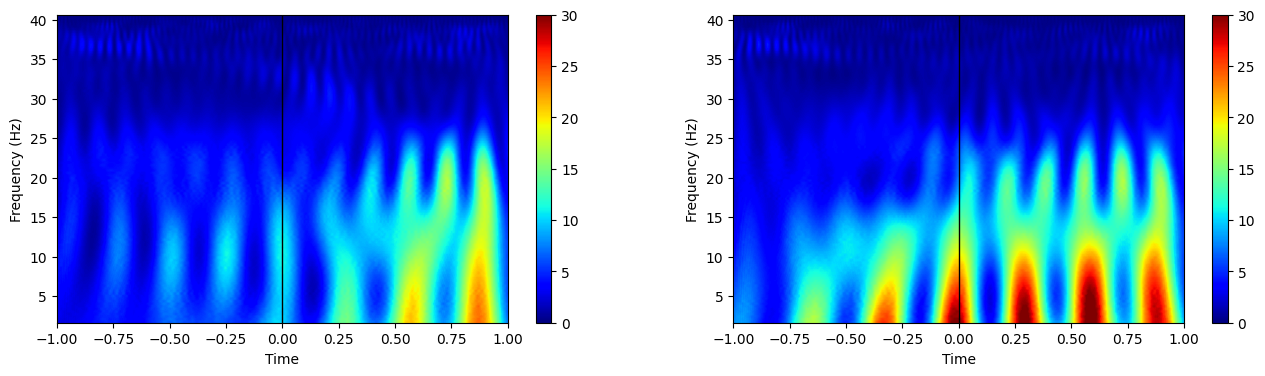

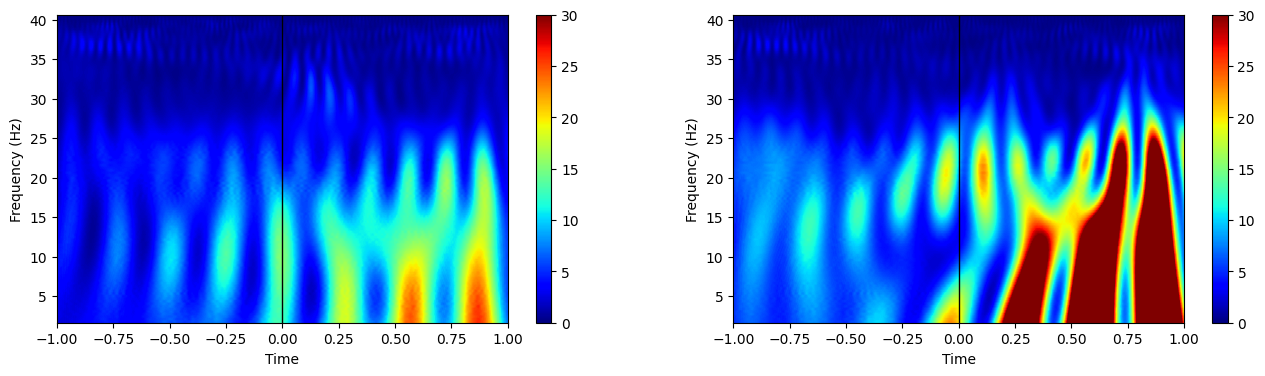

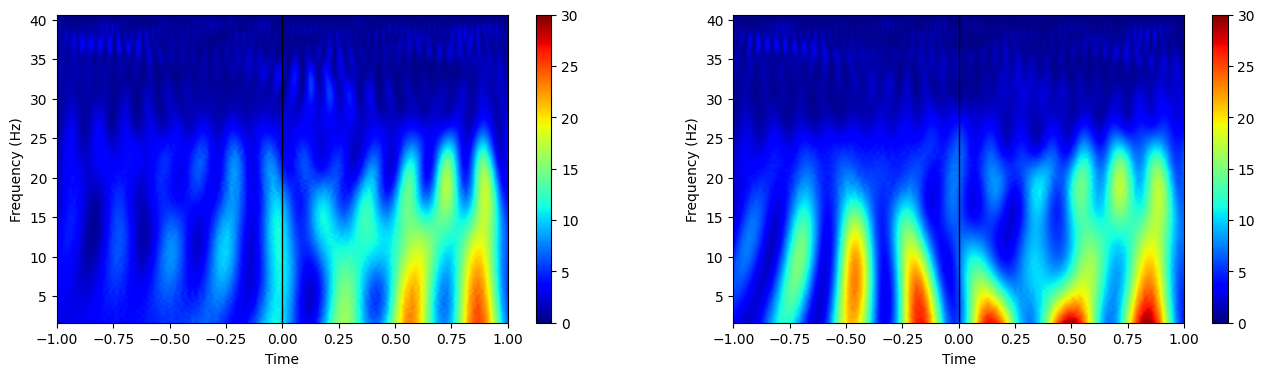

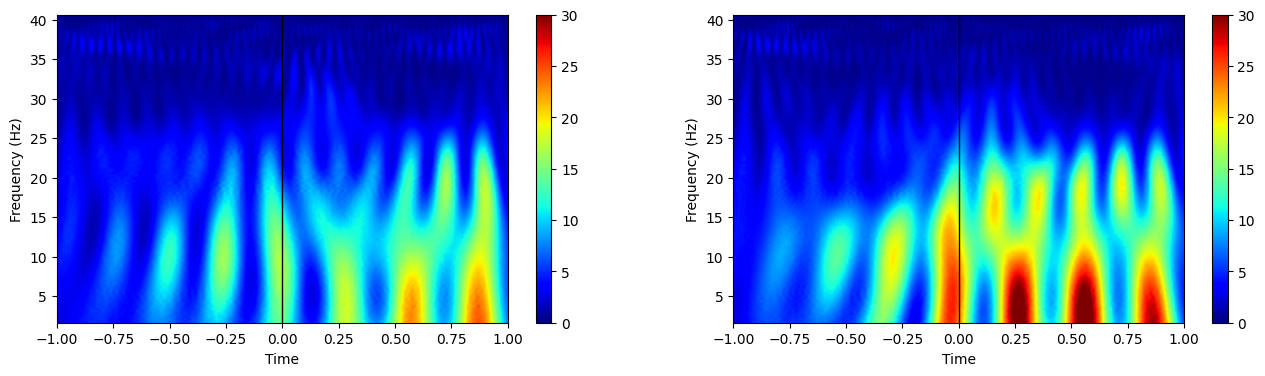

In [ ]:
from preprocessing import *

# Set the path for this subject
path = f"/content/drive/MyDrive/Data/EEGdata_Tripolar/subject1/task_3"

df = read_data_and_preprocessing(path, events=[1], denoise=0, detrend=True, low_f=1, high_f=40, FreqBands=False, minmax=False, zscore=True)

labels = df["events"].to_list()
df.drop(['events'], axis=1, inplace=True)

df_tcre = df.loc[:, ['P3_t', 'C3_t', 'C4_t', 'F5_t']]
df_eeg = df.loc[:, ['P3_e', 'C3_e', 'C4_e', 'F5_e']]

X_eeg, _ = prepare_data(df_eeg, win_size=1501, labels=labels, time_win=((501, 1001)))
X_tcre, _ = prepare_data(df_tcre, win_size=1501, labels=labels, time_win=((501, 1001)))


# Plot
sampling_rate = 250
scales = np.arange(5, 125)
# scales = np.logspace(np.log10(1), np.log10(125), num=64)
# linear_scales = np.arange(5, 30)
# log_scales = np.logspace(np.log10(30), np.log10(125), num=34)
# scales = np.concatenate([linear_scales, log_scales])
wavelet = 'morl'

eeg_avg_coeffs, frequencies = average_wavelet_coefficients(X_eeg, wavelet=wavelet, scales=scales)
teeg_avg_coeffs, _ = average_wavelet_coefficients(X_tcre, wavelet=wavelet, scales=scales)
plot_coefficients(eeg_avg_coeffs, teeg_avg_coeffs, frequencies)

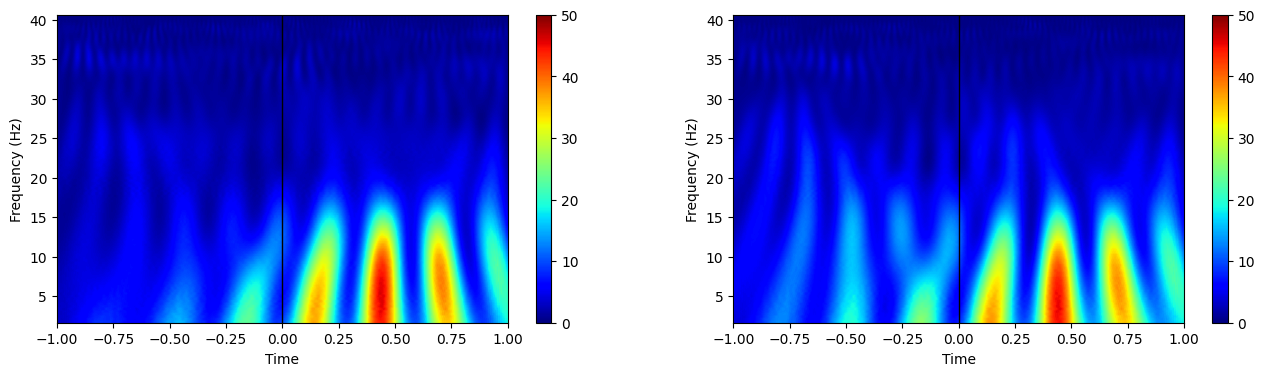

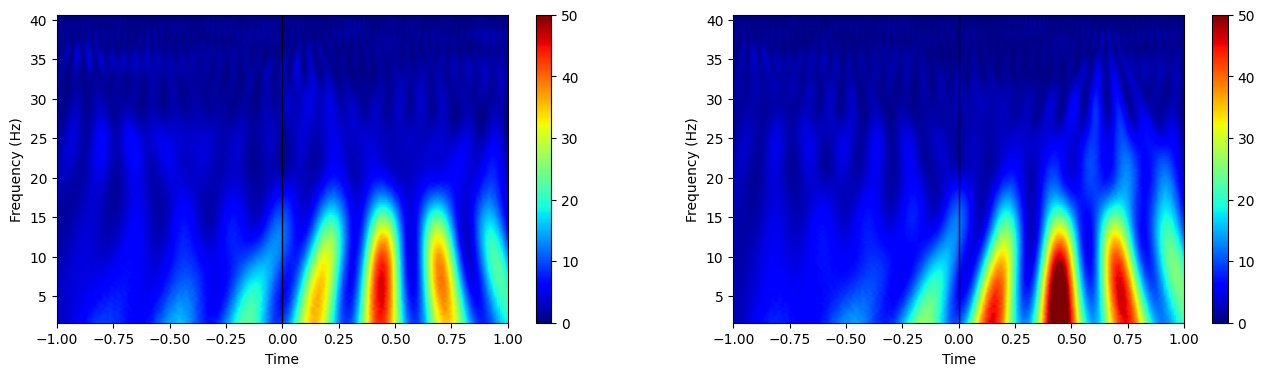

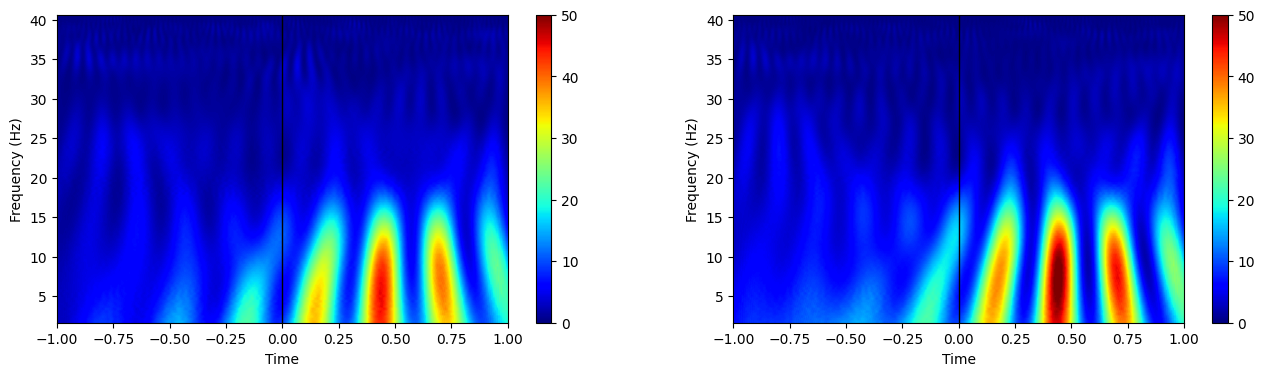

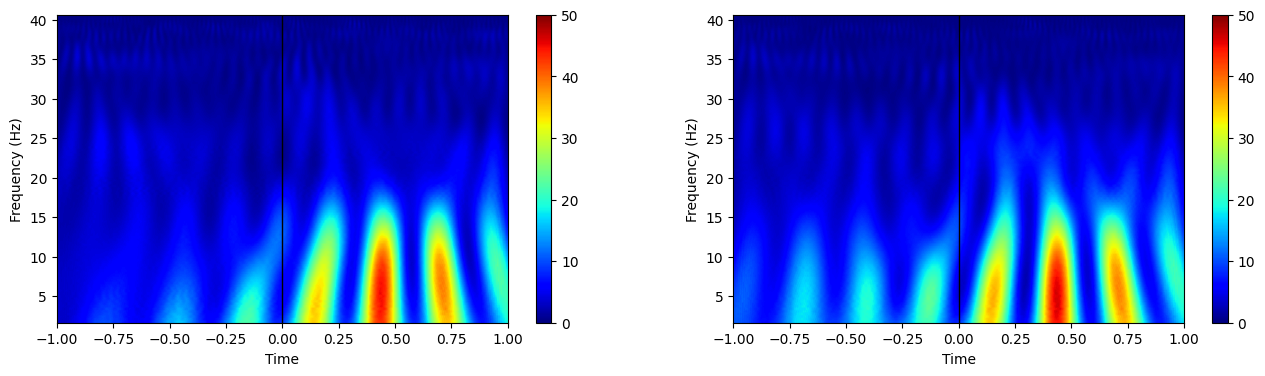

In [ ]:
from preprocessing import *

# Set the path for this subject
path = f"/content/drive/MyDrive/Data/EEGdata_Tripolar/subject1/task_3"

df_0 = read_data_and_preprocessing(path, events=[2], denoise=0, detrend=True, low_f=1, high_f=40, FreqBands=False, minmax=False, zscore=True)

labels_0 = df_0["events"].to_list()
df_0.drop(['events'], axis=1, inplace=True)

df_tcre_0 = df_0.loc[:, ['P3_t', 'C3_t', 'C4_t', 'F5_t']]
df_eeg_0 = df_0.loc[:, ['P3_e', 'C3_e', 'C4_e', 'F5_e']]

X_eeg_0, _ = prepare_data(df_eeg_0, win_size=1501, labels=labels_0, time_win=((501, 1001)))
X_tcre_0, _ = prepare_data(df_tcre_0, win_size=1501, labels=labels_0, time_win=((501, 1001)))


# Plot
sampling_rate = 250
scales = np.arange(5, 125)
# scales = np.logspace(np.log10(1), np.log10(125), num=64)
# linear_scales = np.arange(5, 30)
# log_scales = np.logspace(np.log10(30), np.log10(125), num=34)
# scales = np.concatenate([linear_scales, log_scales])
wavelet = 'morl'

eeg_avg_coeffs, frequencies = average_wavelet_coefficients(X_eeg_0, wavelet=wavelet, scales=scales)
teeg_avg_coeffs, _ = average_wavelet_coefficients(X_tcre_0, wavelet=wavelet, scales=scales)
plot_coefficients(eeg_avg_coeffs, teeg_avg_coeffs, frequencies)

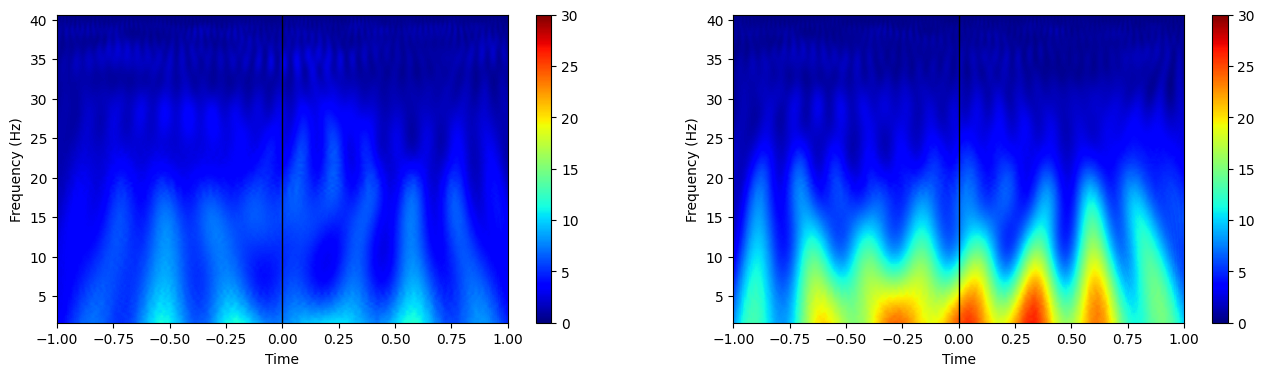

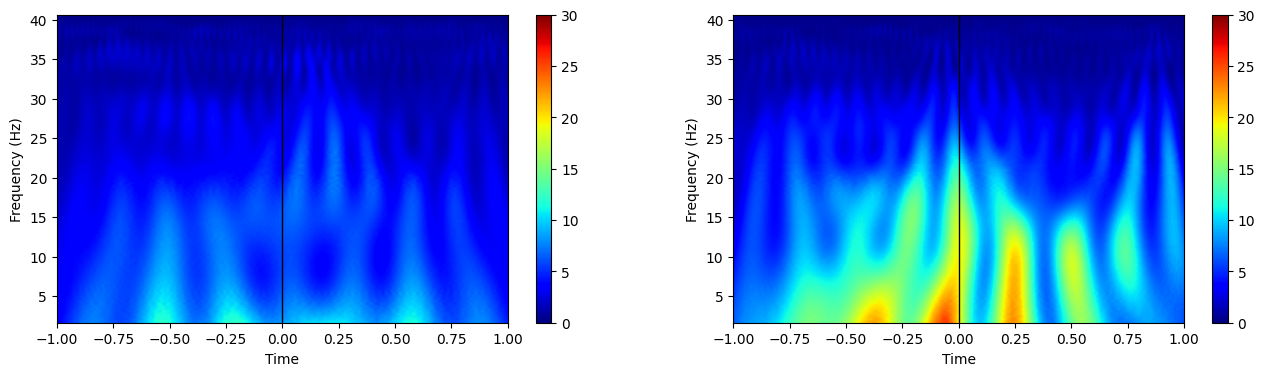

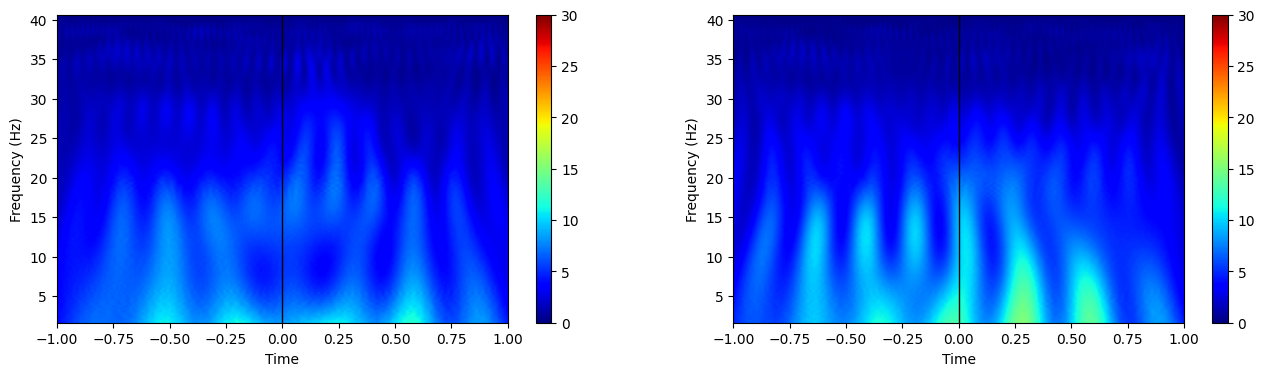

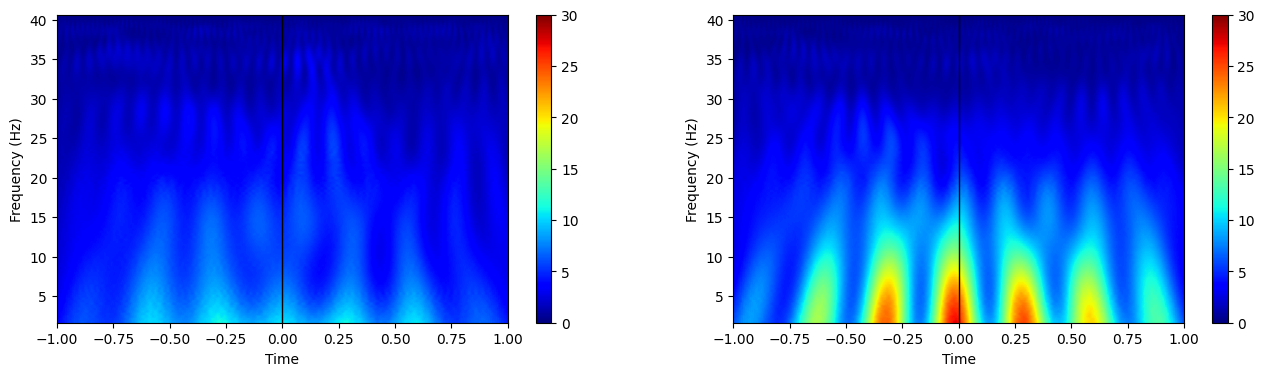

In [ ]:
from preprocessing import *

# Set the path for this subject
path = f"/content/drive/MyDrive/Data/EEGdata_Tripolar/subject1/task_3"

df = read_data_and_preprocessing(path, events=[0], denoise=0, detrend=True, low_f=1, high_f=40, FreqBands=False, minmax=False, zscore=True)

labels = df["events"].to_list()
df.drop(['events'], axis=1, inplace=True)

df_tcre = df.loc[:, ['P3_t', 'C3_t', 'C4_t', 'F5_t']]
df_eeg = df.loc[:, ['P3_e', 'C3_e', 'C4_e', 'F5_e']]

X_eeg, _ = prepare_data(df_eeg, win_size=1501, labels=labels, time_win=((501, 1001)))
X_tcre, _ = prepare_data(df_tcre, win_size=1501, labels=labels, time_win=((501, 1001)))


# Plot
sampling_rate = 250
scales = np.arange(5, 125)
# scales = np.logspace(np.log10(1), np.log10(125), num=64)
# linear_scales = np.arange(5, 30)
# log_scales = np.logspace(np.log10(30), np.log10(125), num=34)
# scales = np.concatenate([linear_scales, log_scales])
wavelet = 'morl'

eeg_avg_coeffs, frequencies = average_wavelet_coefficients(X_eeg, wavelet=wavelet, scales=scales)
teeg_avg_coeffs, _ = average_wavelet_coefficients(X_tcre, wavelet=wavelet, scales=scales)
plot_coefficients(eeg_avg_coeffs, teeg_avg_coeffs, frequencies)

#Text to Table

In [ ]:
# Initialize the nested dictionary structure
subjects = ["S1", "S2", "S3", "S4", "S5", "S6"]
scenarios = ["EEG", "Tripolar"]
models = ["Random Forest", "SVM", "KNN", "XGBoost", "LDA", "Logistic Regression"]

accuracies_dict = {}
for subj in subjects:
    accuracies_dict[subj] = {}
    for scenario in scenarios:
        accuracies_dict[subj][scenario] = {}
        for model in models:
            accuracies_dict[subj][scenario][model] = None

# Fill the dictionary with accuracies from the text file
with open("nomov_power.txt", "r") as file:
    lines = file.readlines()

current_subject = None
current_model = None
current_scn = None

for line in lines:
    # Identify the subject
    if "Processing data" in line:
        current_subject = f"S{line.split('subject')[-1].strip()}"
        continue
    # Identify the model
    elif any(f"Evaluating {model}" in line for model in models):
        current_model = line.split("Evaluating")[1].replace(":", "").strip()
        continue
    elif "EEG" in line:
        current_scn = "EEG"
        continue
    elif "Tripolar" in line:
        current_scn = "Tripolar"
        continue
    elif "Average Accuracy" in line:
        accuracy = float(line.split(":")[-1].replace("%", "").strip())
        accuracies_dict[current_subject][current_scn][current_model] = accuracy
        continue

# Convert nested dictionary to DataFrame for EEG
df_eeg = pd.DataFrame({subject: accuracies_dict[subject]['EEG'] for subject in subjects}).transpose()
df_tripolar = pd.DataFrame({subject: accuracies_dict[subject]['Tripolar'] for subject in subjects}).transpose()

# Combine EEG and Tripolar DataFrames
df_combined = pd.concat([df_eeg, df_tripolar], axis=1, keys=['EEG Acc(%)', 'TCRE Acc(%)'])

# Calculate the mean for each column and append to the DataFrame
mean_values = df_combined.mean(axis=0)
df_combined.loc["Mean"] = mean_values

# Export to Excel
df_combined.to_excel("nomov_power.xlsx", engine='openpyxl')
print("Data exported to accuracies.xlsx with mean values.")



Data exported to accuracies.xlsx with mean values.
